In [34]:
import numpy as np
import copy
import h5py
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage  # PIL and scipy are used here to test the model with my own picture at the end.
from lr_utils import load_dataset

In [35]:
#Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


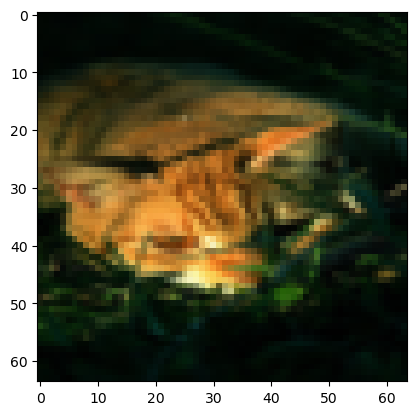

In [36]:
#Exemple of a picture
index = 41
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' picture.")

In [37]:
# train_set_x_orig is a numpy-array of shape (m_train, num_px, num_px, 3)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print("Number of training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_set_x shape: " + str(train_set_x_orig.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x shape: " + str(test_set_x_orig.shape))
print("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [38]:
# Reshape the training and test datasets that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px * num_px * 3, 1)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [39]:
# Strandardize the dataset by dividing every row of the dataset by 255 (RGB value of each pixel)
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

**The main steps for building a Neural Network are:**
1. *Define the model structure (such as number of input features, number of layers, number of neurons in each layer ...)*
2. *Initialize the model's parameters*
3. *Loop:*
    - *Calculate current loss (forward propagation)*
    - *Calculate current gradient (backward propagation)*
    - *Update parameters (gradient descent)*

*Then integrate these three steps into one function called `model()`.*

In [40]:
# Sigmoid function
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [41]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

[0.62245933 0.5        0.88079708]


2. **Initializing parameters**

In [42]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0.0
    return w,b

In [43]:
dim = 2
w,b = initialize_with_zeros(dim)
print("w = " +str(w))
print("b = " +str(b))


w = [[0.]
 [0.]]
b = 0.0


3. **Forward and Backward propagation**

In [44]:
def propagate(w, b, X, Y):

    #Forward propagation
    m = X.shape[1]
    Z= np.dot(w.T,X) + b
    A = sigmoid(Z)

    cost = -1/m * np.sum (Y * np.log(A) + (1 - Y) * np.log(1 - A))

    #Backward propagation
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)

    cost = np.squeeze(np.array(cost))

    grads = {"dw": dw, "db": db}

    return grads, cost

**Optimization :**
    - *The goal is to learn w and b by minimizing the cost function J*

In [45]:
def optimize(w, b, X, Y, num_iterations = 100, learning_rate = 0.009, print_cost = False):

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []
    for i in range(num_iterations):
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        w -= learning_rate * dw
        b -= learning_rate * db

        if i % 100 == 0:
            costs.append(cost)

            if print_cost :
                print("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}

    return params, grads, costs

In [50]:
X = train_set_x
Y = train_set_y

dim = X.shape[0]
w,b = initialize_with_zeros(dim)

params, grads, costs =optimize(w, b, X, Y, num_iterations =100, learning_rate = 0.009, print_cost = False)
print ("w = "+ str(params["w"]))
print ("b = "+ str(params["b"]))
print("dw = "+ str(grads["dw"]))
print("db = "+ str(grads["db"]))
print("Costs = "+ str(costs))

w = [[ 0.00371347]
 [-0.00580846]
 [-0.00243599]
 ...
 [-0.00415961]
 [-0.00941159]
 [ 0.00372733]]
b = -0.004064524052135648
dw = [[0.05732876]
 [0.06275264]
 [0.05601604]
 ...
 [0.05429732]
 [0.0560881 ]
 [0.0392286 ]]
db = 0.13895668753915066
Costs = [array(0.69314718)]


**Predict**

In [51]:
def predict (w, b, X): 
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape (X.shape[0], 1)

    Z = np.dot(w.T,X) + b
    A = sigmoid(Z)

    for i in range(A.shape[1]):
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else :
            Y_prediction[0,i] = 0
            
    return Y_prediction

In [52]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


**Merge all functions into a model**

In [56]:
def model (X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate=0.5, print_cost= False):
    w,b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = params['w']
    b = params['b']
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    #Print the metrics 
    if print_cost:
        print("train accuracy : {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy : {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d



In [57]:
logistic_regression_model = model (train_set_x, train_set_y, test_set_x, test_set_y, num_iterations= 2000, learning_rate=0.005, print_cost= True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy : 99.04306220095694 %
test accuracy : 70.0 %


y = 1, you predicted that it is a "cat" picture.


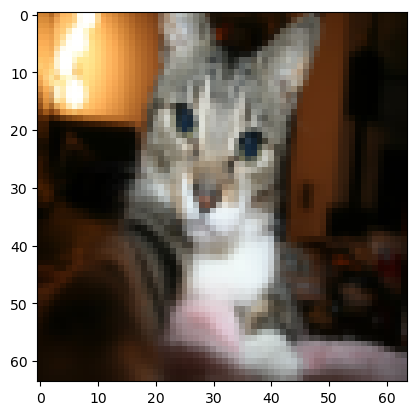

In [59]:
index = 25
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")